In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
iris = load_iris()
iris_dp = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_dp.shape

(150, 4)

In [4]:
iris_dp.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
iris_dp.iloc[:, :-1].describe()

,sepal length (cm),sepal width (cm),petal length (cm)
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000
std,0.828066,0.435866,1.765298
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [6]:
from sklearn.preprocessing import StandardScaler
X_features = iris_dp.iloc[:, :-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [7]:
iris_dp.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

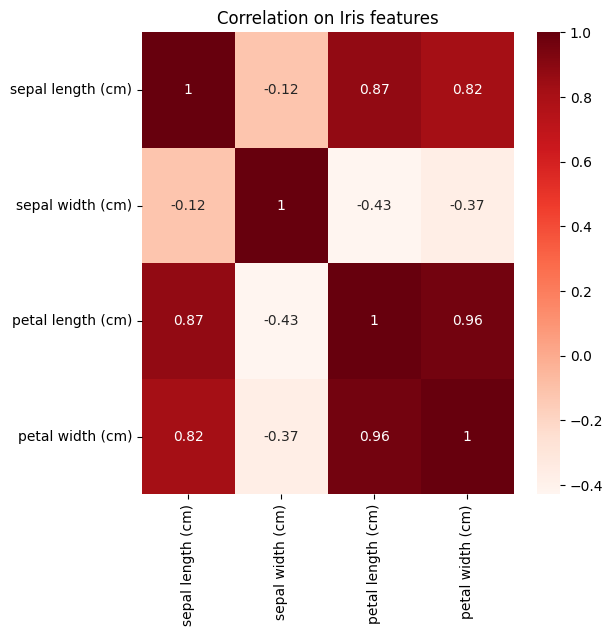

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sb.heatmap(iris_dp.corr(), annot=True, cmap='Reds')
plt.title("Correlation on Iris features")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
data = iris_dp
iris_dp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans= KMeans(n_clusters=3,random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [13]:
labels_kmeans=kmeans.predict(data)
print(labels_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


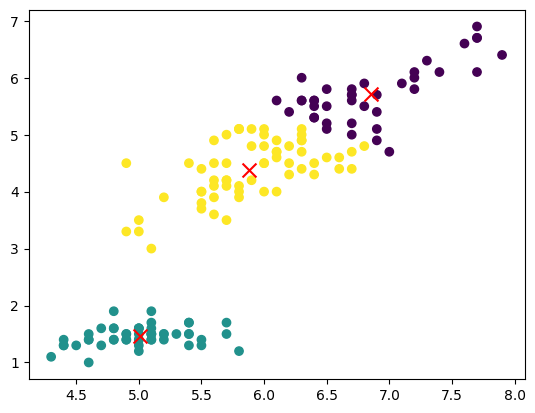

In [14]:
centroids=kmeans.cluster_centers_
plt.scatter(data.iloc[:,0],data.iloc[:,2],c=labels_kmeans)
plt.scatter(centroids[:,0],centroids[:,2],marker='x',s=100,c='red')
plt.show()

In [22]:
import plotly.graph_objects as go
Scene=dict(xaxis=dict(title="sepal length(cm)"),yaxis=dict(title="sepal width(cm)"),zaxis=dict(title="petal length (cm)"))
labels=kmeans.labels_
trace=go.Scatter3d(x=data.iloc[:,0],y=data.iloc[:,1],z=data.iloc[:,2],mode="markers",marker=dict(color=labels,size=10,line=dict(color="black",width=10)))
layout = go.Layout(margin=dict(l=0,r=0), scene=Scene, height=800, width=800)


In [24]:
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
from sklearn.cluster import KMeans
from yelloowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt
